beta for emmbi 1.21079026429
alpha for emmbi -0.000759802323674


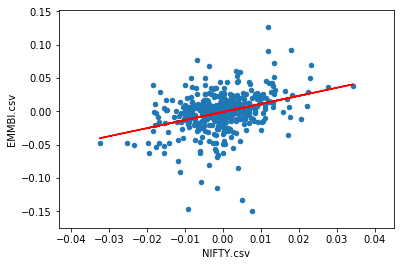

beta for agarwal industries 0.726389792086
alpha for agarwal industries -0.00200700155796


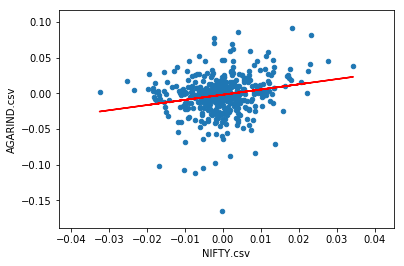

beta for igl 0.734286000443
alpha for igl -0.00178455142882


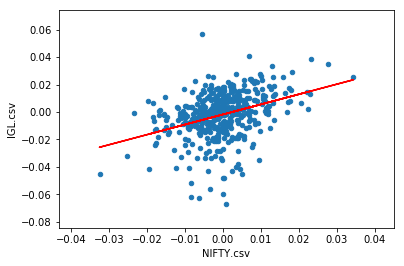

             NIFTY.csv  AGARIND.csv  EMMBI.csv   IGL.csv
NIFTY.csv     1.000000     0.211538   0.330919  0.355901
AGARIND.csv   0.211538     1.000000   0.156732  0.077678
EMMBI.csv     0.330919     0.156732   1.000000  0.080811
IGL.csv       0.355901     0.077678   0.080811  1.000000


In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

def get_data(filename):
    base_dir = "data"
    cwd = os.getcwd()
    path = os.path.join(cwd, base_dir, filename)
    dfstocks = pd.read_csv(path, index_col = "Unnamed: 0")
    return dfstocks

def daily_percentage_change(df):
    return df[:-1].values / df[1:] - 1

def plot_data(data, title = "Daily Percentage Change"):
    #ax = data.plot(title = title, fontsize = 2)
    #ax.set_xlabel("Date")
    #ax.set_ylabel("Percentage Change")
    data.plot(kind = 'scatter', x = 'NIFTY.csv', y = 'EMMBI.csv')
    beta_emmbi, alpha_emmbi = np.polyfit(data['NIFTY.csv'], data['EMMBI.csv'], 1)
    print "beta for emmbi", beta_emmbi
    print "alpha for emmbi", alpha_emmbi
    plt.plot(data['NIFTY.csv'], beta_emmbi*data['NIFTY.csv'] + alpha_emmbi, '-', color = 'red')
    plt.show()
    
    data.plot(kind = 'scatter', x = 'NIFTY.csv', y = 'AGARIND.csv')
    beta_agarind, alpha_agarind = np.polyfit(data['NIFTY.csv'], data['AGARIND.csv'], 1)
    print "beta for agarwal industries", beta_agarind
    print "alpha for agarwal industries", alpha_agarind
    plt.plot(data['NIFTY.csv'], beta_agarind*data['NIFTY.csv'] + alpha_agarind, '-', color = 'red')
    plt.show()
    
    data.plot(kind = 'scatter', x = 'NIFTY.csv', y = 'IGL.csv')
    beta_igl, alpha_igl = np.polyfit(data['NIFTY.csv'], data['IGL.csv'], 1)
    print "beta for igl", beta_igl
    print "alpha for igl", alpha_igl
    plt.plot(data['NIFTY.csv'], beta_igl*data['NIFTY.csv'] + alpha_igl, '-', color = 'red')
    plt.show()
    
    print data.corr(method = 'pearson')

def analyze():
    filename = "ClosePriceAll.csv"
    dfstocks = get_data(filename)
    df_daily_cahnge = daily_percentage_change(dfstocks)
    plot_data(df_daily_cahnge)
    
    
if __name__ == "__main__":
    analyze()